<a href="https://colab.research.google.com/github/SriSharanya-617/polynomial_regression/blob/main/carpricepolynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/CarPrice_Assignment.csv'
df=pd.read_csv(path)
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4w

In [ ]:
x=df[['enginesize']]
y=df['price']

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

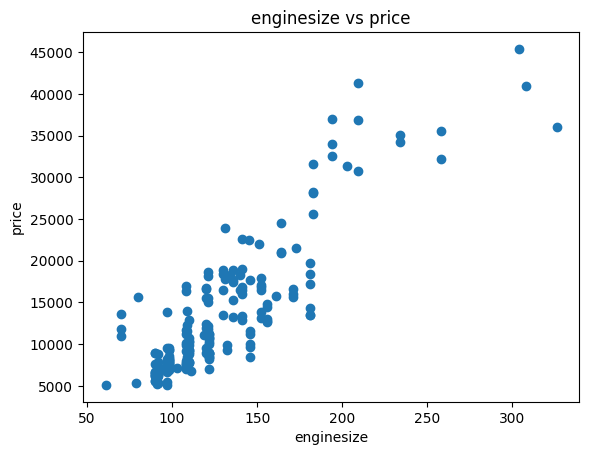

In [ ]:
#visualize the relationship between engine size and price
plt.scatter(x,y)
plt.xlabel("enginesize")
plt.ylabel("price")
plt.title("enginesize vs price")
plt.show()

In [ ]:
#Task 4: Build a predictive model (Simple Linear Regression)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [ ]:
#Task 5: Predict price for engine size = 200
predicted_price=model.predict([[200]])
print(predicted_price)

[25534.23774749]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Task 6: Increase model flexibility (Curved Model)
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(x)
poly_model=LinearRegression()
print(poly_model.fit(x_poly,y))

LinearRegression()


In [ ]:
#Task 7: Compare Predictions
linear_prediction = model.predict([[200]])
polynomial_prediction = poly_model.predict(poly.fit_transform([[200]]))
print(f"Linear Model Prediction for engine size 200: {linear_prediction[0]:.2f}")
print(f"Polynomial Model Prediction for engine size 200: {polynomial_prediction[0]:.2f}")

Linear Model Prediction for engine size 200: 25534.24
Polynomial Model Prediction for engine size 200: 28205.13


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


 Task 8: Analyze which model is better
✔ Which captures trend better?

Curved (Polynomial) model

Because car price does not increase perfectly linearly

✔ Which gives more realistic predictions?

Polynomial model

Especially for very small or very large engine sizes

But warning
Too much flexibility (high degree) → overfitting

In [ ]:
linear_prediction_all = model.predict(x)
polynomial_prediction_all = poly_model.predict(poly.fit_transform(x))


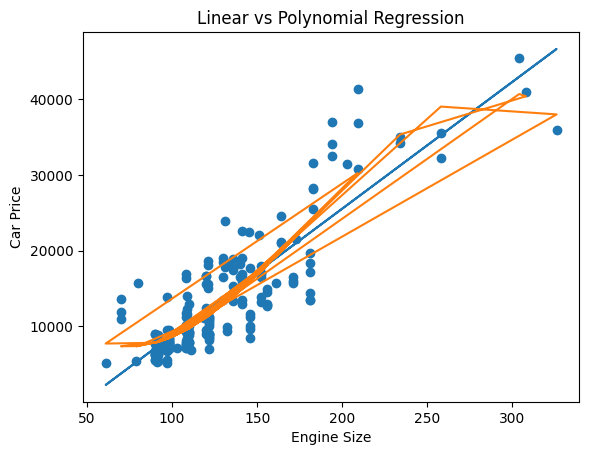

In [ ]:
plt.scatter(x, y)
plt.plot(x, linear_prediction_all)
plt.plot(x, polynomial_prediction_all)
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Linear vs Polynomial Regression")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

linear_mae = mean_absolute_error(y, linear_prediction_all)
poly_mae = mean_absolute_error(y, polynomial_prediction_all)

linear_rmse = np.sqrt(mean_squared_error(y, linear_prediction_all))
poly_rmse = np.sqrt(mean_squared_error(y, polynomial_prediction_all))

print("\nError Comparison:")
print("Linear MAE:", linear_mae)
print("Polynomial MAE:", poly_mae)

print("Linear RMSE:", linear_rmse)
print("Polynomial RMSE:", poly_rmse)


Error Comparison:
Linear MAE: 2815.022353836411
Polynomial MAE: 2692.9296042010114
Linear RMSE: 3870.4342657576967
Polynomial RMSE: 3618.2051973938833


the moel that has less error is considered as the best model

In [ ]:
#task 10 best model
if poly_rmse < linear_rmse:
    print("Polynomial model is better for production.")
else:
    print("Linear model is better for production.")


Polynomial model is better for production.
